# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

# Nulls

In [3]:
print(customers.shape)          #  440 rows, 8 colums
print(customers.isnull().sum()) # No nulls

(440, 8)
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


# Column description : 

### Attribute Information:

1) FRESH: annual spending (m.u.) on fresh products (Continuous);

2) MILK: annual spending (m.u.) on milk products (Continuous);

3) GROCERY: annual spending (m.u.)on grocery products (Continuous);

4) FROZEN: annual spending (m.u.)on frozen products (Continuous)

5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)

6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);

7) CHANNEL: customers Channel - Horeca **(Hotel/Restaurant/CafÃ©)** or **Retail** channel (Nominal)

8) REGION: customers Region  Lisnon, Oporto or Other (Nominal)

### REGION Frequency (Categorical var)

Lisbon 77

Oporto 47

Other Region 316

Total 440

### CHANNEL Frequency (Categorical var)

Horeca 298

Retail 142

Total 440



In [4]:
print(customers.dtypes)

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


### The Channel and Region columns have categorical variables.

# Distribution of sales by product category

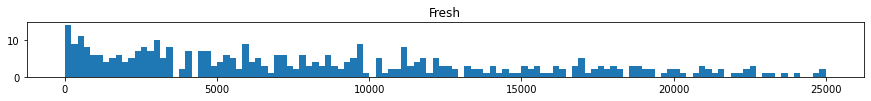

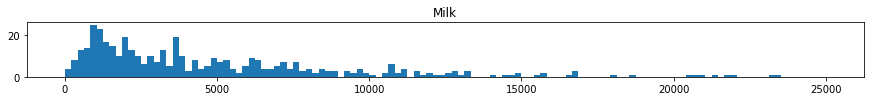

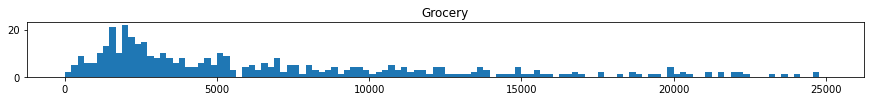

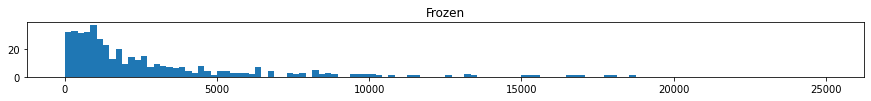

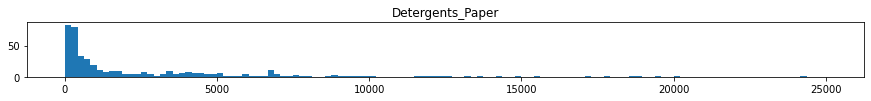

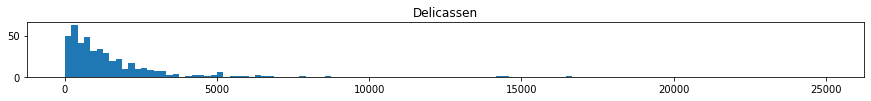

In [5]:
for column in customers.columns[2:]:
    plt.figure(figsize=(15,1))
    plt.hist(customers[column],bins=120, range=(0,25000))
    plt.title(column)

We can see thath the FRESH, MILK and GROCERY products have a bigger Standard Deviation.
All distributions are skewed to the left.

In [6]:
# Your observations here

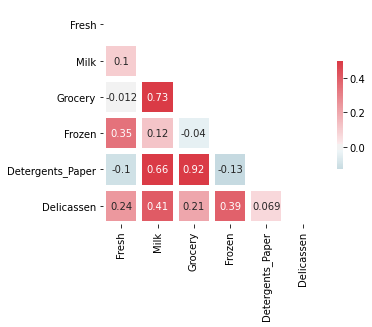

In [7]:
def correlation_matrix(df, drop=None):
    corr = df.drop(columns=drop).corr().copy()
    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=5, cbar_kws={"shrink": .5}, annot=True)

correlation_matrix(customers, drop=['Channel','Region'])

There is a high correlation between the following variables:
- fresh and frozen
- milk and groceries
- milk and detergents_paper
- milk and delicassen
- grocery and detergents_paper
- frozen and delicassen


I would consider dropping the milk column because it has decent correlation with 3 other features

## More than 70% of the clients come from the Region Number 3! :

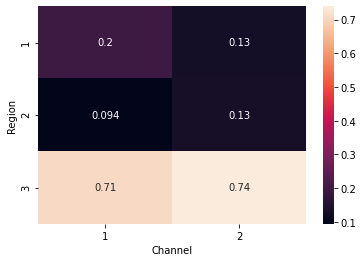

In [8]:
crosstab = pd.crosstab(customers.Region, customers.Channel, normalize="columns")
sns.heatmap(crosstab, annot=True)

## Most clients come from the Channel 1:

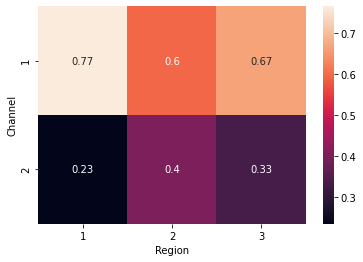

In [9]:
crosstab = pd.crosstab(customers.Channel, customers.Region, normalize="columns")
sns.heatmap(crosstab, annot=True)

In [10]:
customers[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [11]:
# Your code here
to_drop =['Milk', 'Grocery']
customers_lowcorr = customers.drop(columns=to_drop).copy()
customers_lowcorr.head()

,Channel,Region,Fresh,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,214,2674,1338
1,2,3,7057,1762,3293,1776
2,2,3,6353,2405,3516,7844
3,1,3,13265,6404,507,1788
4,2,3,22615,3915,1777,5185


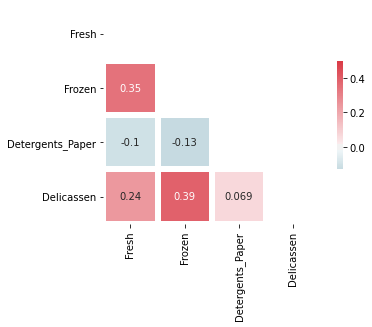

In [12]:
correlation_matrix(customers_lowcorr, drop=['Channel', 'Region'])

As mentioned before, I considered dropping the milk column because it has decent correlation with 3 other features, and also the Grocery feature as it held a correlation higher than .80 with another feature.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [13]:
# Your import here:
from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()  # This is just the function in an alias
customers_scale = scaler.fit(customers_lowcorr)    # Fit my data...
print(customers_scale.n_samples_seen_)
print(customers_scale.mean_) # The mean for my 6 features
print(customers_scale.n_samples_seen_)

440
[1.32272727e+00 2.54318182e+00 1.20002977e+04 3.07193182e+03
 2.88149318e+03 1.52487045e+03]
440


In [14]:
pd.DataFrame(customers_scale.scale_) # More attributes of my model

,0
0,0.467519
1,0.773392
2,12632.948725
3,4849.153520
4,4762.433350
5,2816.899449


### Transforming with my generated customers_scale fit

In [15]:
my_scaled_vars = customers_scale.transform(customers_lowcorr)
pd.DataFrame(my_scaled_vars).head()

,0,1,2,3,4,5
0,1.448652,0.590668,0.052933,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,0.173859,-0.231918,1.299347


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [16]:
# Your code here:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
my_KMeans_fit = model.fit(my_scaled_vars)

### Aqui puedo asignar los labels al dataframe original porque se mantiene la cantidad y orden de mis filas iniciales


In [17]:
customers['labels'] = my_KMeans_fit.labels_
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


### Count the values in `labels`.

In [18]:
customers.labels.value_counts()

1    202
0    138
3     89
2     11
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [19]:
# Your code here
from sklearn.cluster import DBSCAN
DBSCAN_labels = DBSCAN(eps=0.5).fit(my_scaled_vars).labels_
DBSCAN_labels.size

440

In [20]:
customers['labels_DBSCAN'] = DBSCAN_labels

Count the values in `labels_DBSCAN`.

In [21]:
# Your code here
customers['labels_DBSCAN'].value_counts()

 1    166
-1    142
 0     67
 3     30
 6     15
 5      6
 2      6
 7      4
 4      4
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

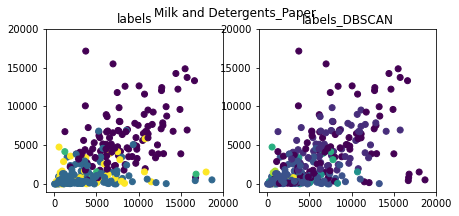

In [22]:
# Your code here:
def compare_clustering(data, features=None, labelsA=None, labelsB=None, title=None):
    f,a= plt.subplots(1, 2, figsize=(7,3))
    f.suptitle(' and '.join(features))
    a[0].scatter(data[features[0]], data[features[1]], c=data[labelsA])
    a[0].set_title(labelsA)
    a[0].set_xlim((-1000, 20000))
    a[0].set_ylim((-1000, 20000))
    a[1].scatter(data[features[0]], data[features[1]],  c=data[labelsB])
    a[1].set_title(labelsB)
    a[1].set_xlim((-1000, 20000))
    a[1].set_ylim((-1000, 20000))
    
compare_clustering(customers, features=['Milk', 'Detergents_Paper'], labelsA='labels', labelsB='labels_DBSCAN')

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

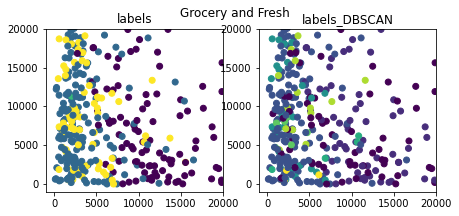

In [23]:
# Your code here:
compare_clustering(customers, features=['Grocery', 'Fresh'], labelsA='labels', labelsB='labels_DBSCAN')

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

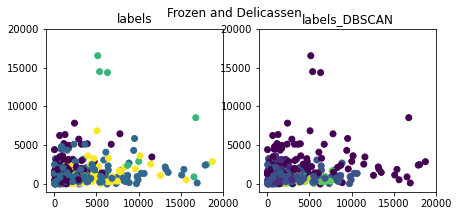

In [24]:
# Your code here:
compare_clustering(customers, features=['Frozen', 'Delicassen'], labelsA='labels', labelsB='labels_DBSCAN')

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [25]:
# Your code here:
customers.groupby('labels').agg('mean').drop(columns=['Channel','Region', 'labels_DBSCAN'])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,
0,8720.268116,10658.572464,16490.826087,1549.456522,7417.550725,1647.934783
1,12123.623762,3172.534653,3569.519802,3061.252475,751.282178,1106.960396
2,48944.272727,13464.363636,12245.727273,19932.363636,1803.636364,10807.636364
3,12240.168539,3264.202247,4124.516854,3372.988764,816.134831,1135.258427


In [26]:
customers.groupby('labels_DBSCAN').agg('mean').drop(columns=['Channel','Region', 'labels'])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels_DBSCAN,,,,,,
-1,17326.901408,10251.612676,13911.753521,5156.140845,5517.485915,2778.091549
0,6943.597015,7317.447761,11674.104478,1097.820896,4949.537313,1253.358209
1,9739.644578,2652.439759,3150.566265,2440.740964,647.632530,872.831325
2,40711.500000,2376.333333,3181.833333,1562.833333,350.166667,654.500000
3,8536.366667,2788.433333,2640.400000,1618.433333,492.633333,693.966667
4,4196.000000,5614.250000,7224.000000,888.250000,4008.250000,906.750000
5,6823.000000,1943.000000,2372.666667,6780.333333,386.500000,613.666667
6,11712.333333,1564.400000,4292.066667,2428.400000,569.466667,818.800000
7,985.500000,2140.500000,3029.500000,542.500000,368.500000,813.000000


Which algorithm appears to perform better?

# Your observations here
It is not easy to decide because the distributions are still very skewed to the left. The DBSCAN seems to have produced more evenly-distributed clusters, which have different means within the same features

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [42]:
# Your code here
for i in range(2,17,2):
    customers[f'labelsKM{i}'] = KMeans(n_clusters=i).fit(my_scaled_vars).labels_
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN,labelsKM2,labelsKM4,labelsKM6,labelsKM8,labelsKM10,labelsKM12,labelsKM14,labelsKM16
0,2,3,12669,9656,7561,214,2674,1338,0,0,0,1,1,2,1,11,0,2
1,2,3,7057,9810,9568,1762,3293,1776,0,0,0,1,1,2,1,11,0,0
2,2,3,6353,8808,7684,2405,3516,7844,0,-1,0,1,1,2,1,11,0,2
3,1,3,13265,1196,4221,6404,507,1788,1,1,1,0,0,1,9,0,1,4
4,2,3,22615,5410,7198,3915,1777,5185,0,-1,0,1,1,2,1,11,0,2


In [28]:
customers.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN,labelsKM2,labelsKM4,labelsKM6,labelsKM8,labelsKM10,labelsKM12,labelsKM14,labelsKM16
0,2,3,12669,9656,7561,214,2674,1338,0,0,1,3,0,1,2,4,11,15
1,2,3,7057,9810,9568,1762,3293,1776,0,0,1,3,0,1,2,4,2,6


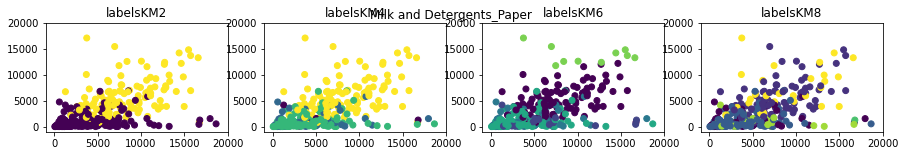

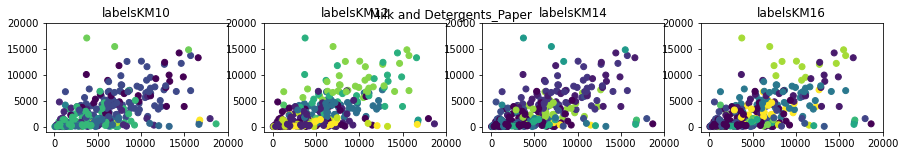

In [39]:
# Your code here:
def compare_clustering(data, features=None, labels=None, title=None):
    f,a= plt.subplots(1, 4, figsize=(15,2))
    f.suptitle(' and '.join(features))
    for i in range(4):
        a[i].scatter(data[features[0]], data[features[1]], c=data[labels[i]])
        a[i].set_title(labels[i])
        a[i].set_xlim((-1000, 20000))
        a[i].set_ylim((-1000, 20000))
compare_clustering(customers, features= ['Milk', 'Detergents_Paper'], labels=['labelsKM2',
                                                                             'labelsKM4',
                                                                             'labelsKM6',
                                                                             'labelsKM8'])
compare_clustering(customers, features= ['Milk', 'Detergents_Paper'], labels=['labelsKM10',
                                                                             'labelsKM12',
                                                                             'labelsKM14',
                                                                             'labelsKM16'])

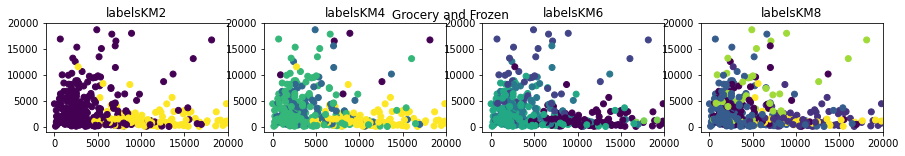

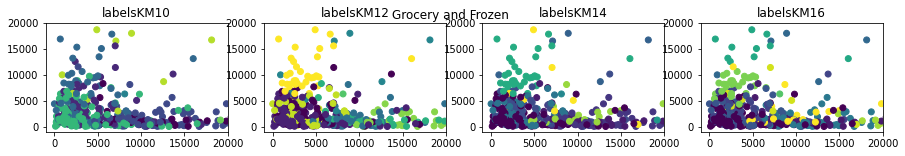

In [40]:
features = ['Grocery', 'Frozen']
compare_clustering(customers, features=features, labels=['labelsKM2','labelsKM4',
                                                         'labelsKM6','labelsKM8'])
compare_clustering(customers, features=features , labels=['labelsKM10','labelsKM12',
                                                 'labelsKM14','labelsKM16'])

# Your comment here
Apparently, the lower KMeans have a better ability to cluster this data. Specifically the KMeans with an `n` of 2 and 4 ns

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [47]:
# Your code here
for i in range(2,17,2):
    customers[f'labelsDB{i}'] = DBSCAN(eps=i).fit(my_scaled_vars).labels_
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN,...,labelsKM14,labelsKM16,labelsDBS2,labelsDBS4,labelsDBS6,labelsDBS8,labelsDBS10,labelsDBS12,labelsDBS14,labelsDBS16
0,2,3,12669,9656,7561,214,2674,1338,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,3,7057,9810,9568,1762,3293,1776,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,6353,8808,7684,2405,3516,7844,0,-1,...,0,0,0,0,0,0,0,0,0,0
3,1,3,13265,1196,4221,6404,507,1788,1,1,...,0,0,1,0,0,0,0,0,0,0
4,2,3,22615,5410,7198,3915,1777,5185,0,-1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Your comment here
features = ['Grocery', 'Frozen']
compare_clustering(customers, features=features, labels=['labelsDB2','labelsDB4',
                                                         'labelsDB6','labelsDB8'])
compare_clustering(customers, features=features , labels=['labelsDB10','labelsKM12',
                                                         'labelsDB14','labelsDB16'])